In [6]:
!python examples/ppo_gym.py --env-name LunarLanderContinuous-v2 --num-threads 1 --max-iter-num 100 --save-model-interval 9

0	T_sample 2.0666	T_update 2.3863	R_min -484.04	R_max -33.86	R_avg -235.93
1	T_sample 2.1128	T_update 2.5780	R_min -441.17	R_max -43.67	R_avg -233.84
2	T_sample 1.7811	T_update 2.3833	R_min -482.81	R_max -40.77	R_avg -165.85
3	T_sample 1.7952	T_update 2.5615	R_min -344.42	R_max -29.95	R_avg -133.84
4	T_sample 2.2733	T_update 3.1896	R_min -292.61	R_max 3.86	R_avg -110.95
5	T_sample 2.7688	T_update 2.5002	R_min -190.17	R_max 3.07	R_avg -76.93
6	T_sample 5.7315	T_update 2.9882	R_min -188.74	R_max 22.15	R_avg -40.35
7	T_sample 2.5198	T_update 2.9458	R_min -99.08	R_max 31.73	R_avg -21.11
8	T_sample 10.8763	T_update 4.1315	R_min -135.35	R_max 0.51	R_avg -41.88
9	T_sample 10.0968	T_update 3.5179	R_min -83.29	R_max 39.75	R_avg -9.90
10	T_sample 10.8750	T_update 2.9742	R_min -53.16	R_max 39.25	R_avg -13.24
11	T_sample 13.8731	T_update 4.2795	R_min -336.26	R_max 11.12	R_avg -144.63
12	T_sample 14.4259	T_update 6.6707	R_min -19.15	R_max 85.92	R_avg 25.22
13	T_sample 11.5839	T_update 7.0076	R_min 

C:\Anaconda3\envs\irl\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [7]:
!python gail/save_expert_traj.py --env-name LunarLanderContinuous-v2 --model-path assets/learned_models/LunarLanderContinuous-v2_ppo.p

(8,)
Episode 0	 reward: 213.66
(8,)
Episode 1	 reward: 267.49
(8,)
Episode 2	 reward: 201.78
(8,)
Episode 3	 reward: 230.01
(8,)
Episode 4	 reward: 238.91
(8,)
Episode 5	 reward: 198.41
(8,)
Episode 6	 reward: 234.78
(8,)
Episode 7	 reward: 238.45
(8,)
Episode 8	 reward: 225.08
(8,)
Episode 9	 reward: 235.19


C:\Anaconda3\envs\irl\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


(8,)
Episode 10	 reward: 223.63
(8,)
Episode 11	 reward: 256.79
(8,)
Episode 12	 reward: 266.49
(8,)
Episode 13	 reward: 210.47
(8,)
Episode 14	 reward: 42.94
(8,)
Episode 15	 reward: 229.86
(8,)
Episode 16	 reward: 229.70
(8,)
Episode 17	 reward: 256.93
(8,)
Episode 18	 reward: 256.62
(8,)
Episode 19	 reward: 219.60
(8,)
Episode 20	 reward: 233.34
(8,)
Episode 21	 reward: 211.68
(8,)
Episode 22	 reward: 219.71
(8,)
Episode 23	 reward: 265.94
(8,)
Episode 24	 reward: 275.62
(8,)
Episode 25	 reward: 229.89
(8,)
Episode 26	 reward: 196.50
(8,)
Episode 27	 reward: 266.97
(8,)
Episode 28	 reward: 270.63
(8,)
Episode 29	 reward: 271.87
(8,)
Episode 30	 reward: 276.09
(8,)
Episode 31	 reward: 238.82
(8,)
Episode 32	 reward: 264.46
(8,)
Episode 33	 reward: 206.14
(8,)
Episode 34	 reward: 225.80
(8,)
Episode 35	 reward: 207.25
(8,)
Episode 36	 reward: 279.21
(8,)
Episode 37	 reward: 205.30
(8,)
Episode 38	 reward: 252.24
(8,)
Episode 39	 reward: 220.45
(8,)
Episode 40	 reward: 269.01
(8,)
Epis

In [1]:
import os
for power in [0.5, 0.75, 1.0, 1.5, 2.0]:
    for alpha in [1.0, 0.99, 0.95, 0.9]:
        string = f'python gail/algo_gym.py --env-name LunarLanderContinuous-v2 --expert-traj-path assets/envLunarLanderContinuous-v2/expert_traj/LunarLanderContinuous-v2_expert_traj.p --alpha {alpha} --num-threads 1 --max-iter-num 200 --alg gail --mass-mulL {power} --reward-type positive --save-model-interval 1'
        os.system(string)

KeyboardInterrupt: 

In [ ]:
import os
string = f'python gail/dac_gym.py --env LunarLanderContinuous-v2 --expert-traj-path assets/envLunarLanderContinuous-v2/expert_traj/LunarLanderContinuous-v2_expert_traj.p'
os.system(string)

# Plot Learning Curves


In [49]:
!python analysis/learning_curves_plotter.py --env-name MountainCarContinuous-v0 --alg gail --alpha 1.0 0.99 0.95 0.9 --seed 1 --mass-mulL 2.0

(1, 50)
(1, 50)
(1, 50)
(1, 50)


In [50]:
# Check robustness

In [4]:
import pickle
import sys
import argparse
import copy
import ast
import os
import gym
import gym_simple
#sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__file__), '..')))
from itertools import count
from utils import *
from utils import plot
from gail.value_iteration_gym import PolicyNet, value_iteration

import pickle
import sys
import argparse
import copy
import ast
import os
import gym
import gym_simple
from itertools import count
from utils import *
from utils import plot
from gail.value_iteration_gym import PolicyNet, value_iteration

def evaluate_loop(policy_net, running_state, expert_flag, env, is_disc_action, max_steps = 500):

    num_steps = 0
    episodes_reward = []
    dtype = torch.float64
    for i_episode in count():

        state = env.reset()
        state_expert = copy.deepcopy(state)
        """if args.env_name == "gridworld-v0":
            s_index_expert = env.state_to_index(state_expert)"""
        state = running_state(state)
        reward_episode = 0

        for t in range(10000):
            state_var = tensor(state).unsqueeze(0).to(dtype)
            # choose mean action
            if expert_flag and args.env_name == "gridworld-v0":
                """if args.env_name == "gridworld-v0":
                    action = policy_net.select_action(s_index_expert)
                else:"""
                action = policy_net.select_action(state_expert)
            else:
                if not is_disc_action:
                    action = policy_net(state_var)[0][0].detach().numpy()
                else:
                    action = policy_net.select_action(state_var)[0].numpy()
            # action = policy_net.select_action(state_var)[0].cpu().numpy()
            action = int(action) if is_disc_action else action.astype(np.float64)
            #print(action, "action")
            next_state, reward, done, _ = env.step(action.clip(-1.0, 1.0))
            state_expert = copy.deepcopy(next_state)
            """if args.env_name == "gridworld-v0":
                s_index_expert = env.state_to_index(state_expert)"""
            next_state = running_state(next_state)
            reward_episode += reward
            num_steps += 1

            if done or num_steps >= max_steps:

                break

            state = next_state
        if done:
            episodes_reward.append(reward_episode)
        print('Episode {}\t reward: {:.2f}'.format(i_episode, reward_episode))

        if num_steps >= max_steps:
            break

    return np.mean(episodes_reward)


def robust_plot(env_name, alg_list, alpha_list, seeds_list, muls_list):
    dtype = torch.float64
    torch.set_default_dtype(dtype)


    to_plot = []
    to_plot_std = []


    subfolder = "env"+str(env_name)+"power1.0"
    if not os.path.isdir(assets_dir(subfolder)):
        os.makedirs(assets_dir(subfolder))


    torch.manual_seed(0)
    env = gym.make(env_name)
    is_disc_action = len(env.action_space.shape) == 0
    state_dim = env.observation_space.shape[0]

    if not os.path.isdir("../plot/" + subfolder):
        os.makedirs("../plot/" + subfolder)

    gail_done = False
    expert_done = False

    for alg in alg_list:
        for alpha in alpha_list:
            to_append = []
            to_append_std = []
            for mass_mulL in muls_list:
                
                env = gym.make(env_name)
                env.seed(0)
                env.env.power *= float(mass_mulL)
                means_avg = []
                stds_avg = []
                _, running_state = pickle.load(
                open(os.path.join(assets_dir("env" + env_name),
                                          'expert_traj/' + env_name + "_expert_traj.p"), "rb"))
                data_subfolder = "env"+env_name + "powerL" + str(mass_mulL) + "powerE1.0"

                for seed in seeds_list:
                    means = []

                    if not alg == "expert":

                        if os.path.getsize(os.path.join(assets_dir(data_subfolder),
                                                                            'learned_models/{}_{}_{}.p'.format(
                                                                                env_name + str(seed), alg, alpha))) > 0:
                            policy_net, _, _ = pickle.load(open(os.path.join(assets_dir(data_subfolder),
                                                                             'learned_models/{}_{}_{}.p'.format(
                                                                                 env_name + str(seed), alg, alpha)), "rb"))

                        expert_flag = False
                    else:
                        policy_net, _, _ = pickle.load(open(os.path.join(assets_dir("learned_models"), env_name + "_ppo.p"), "rb"))
                        expert_flag = True


                    if not running_state is None:
                        running_state.fix = True
                    else:
                        running_state = lambda x: x

                    for _ in range(10):
                        mean_reward = evaluate_loop(policy_net, running_state, expert_flag, env, is_disc_action)
                        means.append(mean_reward)

                    means_avg.append(np.mean(means))
                    stds_avg.append(np.std(means))

                to_append.append(np.mean(means_avg))
                to_append_std.append(np.mean(stds_avg))
                #to_append_std.append(np.std(means_avg))
            if alg == "expert" and expert_done:
                break
            if not alg == "expert":
                to_append = np.array(to_append)
                to_append_std = np.array(to_append_std)
                to_plot.append(to_append)
                to_plot_std.append(to_append_std)
            else:
                to_append = np.array(to_append)
                ones = np.ones_like(to_append)
                to_append = np.mean(to_append)*ones
                to_append_std = np.mean(to_append_std)*ones
                to_plot.append(to_append)
                to_plot_std.append(to_append_std)
            if alg == "expert":
                expert_done = True
                
    base_names = [alg_name for alg_name in ["expert"] if alg_name in alg_list]
    names = base_names + [ alg_name + alpha for alpha in alpha_list for alg_name in alg_list]

    pickle.dump((to_plot, to_plot_std, names), open("../plot/" + subfolder + "/DataCompareAlphas"
                                                    + env_name +str(seeds_list)+alg[0]+".p", 'wb'))

    plot.plot_lines_and_ranges(list_to_plot=to_plot,
                              list_sigmas=to_plot_std,
                              list_name= names,
                              axis_label=["Power", "Total Reward"],
                              folder="../plot/"+subfolder+"/",
                              title=alg+"CompareAlphas" + env_name +str(seeds_list),
                              x_axis=muls_list)


In [5]:
#TODO: Understand which algo is erforming badly at the beginning
# Why there is not 0.5 and 0.75 ?
robust_plot("LunarLanderContinuous-v2", ["gail"], ["1.0", "0.99", "0.95", "0.9"], ["1"], ["0.5", "0.75", "1.0", "1.5", "2.0"])

AttributeError: 'LunarLanderContinuous' object has no attribute 'power'

# GAIFO experiments

In [84]:
import os
for power in [0.5, 0.75, 1.0, 1.5, 2.0]:
    for alpha in [1.0, 0.99, 0.95, 0.9]:
        string = f'python gail/algo_gym.py --env-name MountainCarContinuous-v0 --expert-traj-path assets/envMountainCarContinuous-v0/expert_traj/MountainCarContinuous-v0_state_only_expert_traj.p --alpha {alpha} --num-threads 1 --max-iter-num 50 --alg gaifo --mass-mulL {power} --save-model-interval 1'
        os.system(string)

C:\Anaconda3\envs\irl\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Episode 0	 reward: 88.60
Episode 1	 reward: 85.12
Episode 2	 reward: 85.48
Episode 3	 reward: -5.21
Episode 0	 reward: 88.66
Episode 1	 reward: 85.47
Episode 2	 reward: 85.67
Episode 3	 reward: -6.42
Episode 0	 reward: 88.61
Episode 1	 reward: 85.58
Episode 2	 reward: 88.69
Episode 3	 reward: -9.48
Episode 0	 reward: 85.66
Episode 1	 reward: 85.48
Episode 2	 reward: 85.22
Episode 3	 reward: -3.44
Episode 0	 reward: 85.69
Episode 1	 reward: 85.21
Episode 2	 reward: 88.69
Episode 3	 reward: -6.62
Episode 0	 reward: 85.43
Episode 1	 reward: 88.67
Episode 2	 reward: 85.66
Episode 3	 reward: -6.64
Episode 0	 reward: 85.32
Episode 1	 reward: 85.43
Episode 2	 reward: 85.43
Episode 3	 reward: -3.33
Episode 0	 reward: 85.60
Episode 1	 reward: 88.26
Episode 2	 reward: 85.76
Episode 3	 reward: -3.51
Episode 0	 reward: 85.58
Episode 1	 reward: 85.21
Episode 2	 reward: 85.69
Episode 3	 reward: -3.04
Episode 0	 reward: 85.21
Episode 1	 reward: 85.67
Episode 2	 reward: 85.61
Episode 3	 reward: -2.57


Episode 5	 reward: 96.60
Episode 6	 reward: 96.90
Episode 7	 reward: 96.60
Episode 8	 reward: 97.00
Episode 9	 reward: 96.80
Episode 10	 reward: 96.80
Episode 11	 reward: 96.80
Episode 12	 reward: 96.90
Episode 13	 reward: 96.50
Episode 14	 reward: 96.60
Episode 15	 reward: -1.00
Episode 0	 reward: 97.00
Episode 1	 reward: 96.60
Episode 2	 reward: 97.00
Episode 3	 reward: 96.80
Episode 4	 reward: 96.70
Episode 5	 reward: 96.70
Episode 6	 reward: 96.80
Episode 7	 reward: 96.60
Episode 8	 reward: 96.80
Episode 9	 reward: 96.80
Episode 10	 reward: 96.80
Episode 11	 reward: 96.90
Episode 12	 reward: 96.90
Episode 13	 reward: 96.80
Episode 14	 reward: 96.70
Episode 15	 reward: -1.90
Episode 0	 reward: 96.80
Episode 1	 reward: 96.60
Episode 2	 reward: 96.80
Episode 3	 reward: 96.90
Episode 4	 reward: 97.00
Episode 5	 reward: 96.90
Episode 6	 reward: 96.70
Episode 7	 reward: 96.60
Episode 8	 reward: 96.90
Episode 9	 reward: 96.80
Episode 10	 reward: 96.60
Episode 11	 reward: 96.90
Episode 12	

Episode 9	 reward: 95.74
Episode 10	 reward: -1.19
Episode 0	 reward: 95.00
Episode 1	 reward: 95.80
Episode 2	 reward: 94.57
Episode 3	 reward: 94.71
Episode 4	 reward: 94.82
Episode 5	 reward: 96.10
Episode 6	 reward: 94.71
Episode 7	 reward: 96.20
Episode 8	 reward: 95.71
Episode 9	 reward: -5.09
Episode 0	 reward: 94.87
Episode 1	 reward: 95.03
Episode 2	 reward: 94.73
Episode 3	 reward: 95.12
Episode 4	 reward: 94.98
Episode 5	 reward: 95.83
Episode 6	 reward: 96.10
Episode 7	 reward: 96.00
Episode 8	 reward: 95.75
Episode 9	 reward: -5.11
Episode 0	 reward: 94.60
Episode 1	 reward: 95.11
Episode 2	 reward: 94.69
Episode 3	 reward: 95.01
Episode 4	 reward: 95.95
Episode 5	 reward: 96.10
Episode 6	 reward: 95.87
Episode 7	 reward: 94.83
Episode 8	 reward: 94.67
Episode 9	 reward: 95.92
Episode 10	 reward: -0.06
Episode 0	 reward: 97.00
Episode 1	 reward: 96.50
Episode 2	 reward: 96.70
Episode 3	 reward: 96.90
Episode 4	 reward: 96.90
Episode 5	 reward: 96.70
Episode 6	 reward: 96.8

Episode 5	 reward: 93.34
Episode 6	 reward: 93.44
Episode 7	 reward: -2.10
Episode 0	 reward: 93.33
Episode 1	 reward: 93.33
Episode 2	 reward: 93.62
Episode 3	 reward: 93.35
Episode 4	 reward: 93.33
Episode 5	 reward: 93.36
Episode 6	 reward: 93.33
Episode 7	 reward: -1.70
Episode 0	 reward: 93.44
Episode 1	 reward: 93.33
Episode 2	 reward: 93.45
Episode 3	 reward: 93.37
Episode 4	 reward: 93.33
Episode 5	 reward: 93.35
Episode 6	 reward: 93.34
Episode 7	 reward: -1.80
Episode 0	 reward: 93.33
Episode 1	 reward: 93.33
Episode 2	 reward: 93.33
Episode 3	 reward: 93.36
Episode 4	 reward: 93.33
Episode 5	 reward: 93.36
Episode 6	 reward: 93.38
Episode 7	 reward: -1.70
Episode 0	 reward: 93.44
Episode 1	 reward: 93.43
Episode 2	 reward: 93.32
Episode 3	 reward: 93.33
Episode 4	 reward: 93.33
Episode 5	 reward: 93.32
Episode 6	 reward: 93.41
Episode 7	 reward: -1.80
Episode 0	 reward: 93.55
Episode 1	 reward: 93.33
Episode 2	 reward: 93.43
Episode 3	 reward: 93.44
Episode 4	 reward: 93.35


Episode 1	 reward: 85.28
Episode 2	 reward: 85.37
Episode 3	 reward: -2.31
Episode 0	 reward: 85.54
Episode 1	 reward: 85.64
Episode 2	 reward: 85.55
Episode 3	 reward: -3.04
Episode 0	 reward: 85.54
Episode 1	 reward: 85.19
Episode 2	 reward: 85.61
Episode 3	 reward: -3.27
Episode 0	 reward: 85.19
Episode 1	 reward: 85.59
Episode 2	 reward: 85.55
Episode 3	 reward: -2.95
Episode 0	 reward: 89.58
Episode 1	 reward: 92.61
Episode 2	 reward: 89.15
Episode 3	 reward: 89.52
Episode 4	 reward: -8.61
Episode 0	 reward: 92.38
Episode 1	 reward: 89.46
Episode 2	 reward: 92.43
Episode 3	 reward: 89.58
Episode 4	 reward: -10.55
Episode 0	 reward: 89.58
Episode 1	 reward: 92.60
Episode 2	 reward: 89.40
Episode 3	 reward: 89.21
Episode 4	 reward: 92.62
Episode 5	 reward: -0.28
Episode 0	 reward: 89.39
Episode 1	 reward: 92.64
Episode 2	 reward: 89.58
Episode 3	 reward: 92.63
Episode 4	 reward: 92.57
Episode 5	 reward: -4.12
Episode 0	 reward: 89.38
Episode 1	 reward: 92.41
Episode 2	 reward: 92.56

Episode 15	 reward: -1.81
Episode 0	 reward: 96.80
Episode 1	 reward: 96.56
Episode 2	 reward: 96.80
Episode 3	 reward: 96.90
Episode 4	 reward: 97.00
Episode 5	 reward: 96.90
Episode 6	 reward: 96.71
Episode 7	 reward: 96.56
Episode 8	 reward: 96.90
Episode 9	 reward: 96.80
Episode 10	 reward: 96.64
Episode 11	 reward: 96.90
Episode 12	 reward: 96.90
Episode 13	 reward: 96.47
Episode 14	 reward: 96.90
Episode 15	 reward: -1.40
Episode 0	 reward: 96.70
Episode 1	 reward: 96.62
Episode 2	 reward: 96.90
Episode 3	 reward: 96.60
Episode 4	 reward: 96.90
Episode 5	 reward: 96.80
Episode 6	 reward: 96.65
Episode 7	 reward: 96.64
Episode 8	 reward: 96.80
Episode 9	 reward: 96.80
Episode 10	 reward: 96.65
Episode 11	 reward: 96.90
Episode 12	 reward: 96.64
Episode 13	 reward: 96.48
Episode 14	 reward: 96.90
Episode 15	 reward: -0.50
Episode 0	 reward: 96.90
Episode 1	 reward: 97.00
Episode 2	 reward: 96.80
Episode 3	 reward: 97.00
Episode 4	 reward: 96.80
Episode 5	 reward: 97.00
Episode 6	 r

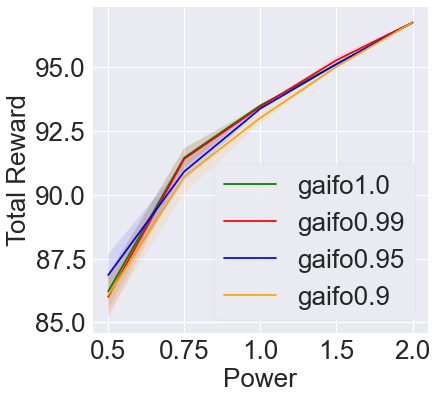

In [93]:
robust_plot("MountainCarContinuous-v0", ["gaifo"], ["1.0", "0.99", "0.95", "0.9"], ["1"], ["0.5", "0.75", "1.0", "1.5", "2.0"])